<a href="https://colab.research.google.com/github/kixtter/AnalisisInteligenteDatos/blob/main/Unidad%201/Caso_5_Regresion_lineal_simple_MunRepMex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 5. Regresión Lineal Simple. Datos de población y confirmados de Municipios

## Objetivo
Realizar una tarea de predicción de casos confirmados en datos de municipios de la República Mexicana mediante el algoritmo de machine learning de regresión lineal simple

##Descripción
*  Cargar datos de cantidad de habitantes de una población de municipios y sus casos confirmados de COVID. Los datos son casos confirmados en periodo 02-02-2020 al 18-09-2021 en formato DD-MM-AAAA(dia-mes-año)
*  Archivo csv localizado en: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados%20municipio.csv
*  Fuente obtenida de datos del gobierno de México: https://datos.covid-19.conacyt.mx/#DownZCSV
*  Explorar los datos
*  Definir la variable independiente y la variable dependiente.
*  Aplicar el modelo de regresión lineal simple.
*  Evaluar el modelo con error cuadrado medio y su significado.
*  Hacer estimaciones para una cierta cantidad de población para determinar cuantos casos confirmados serían. Son predicciones.

##Fundamento Teórico
**Regresión Lineal Simple**

El objetivo de un modelo de regresión es tratar de explicar la relación que existe entre una variable dependiente(variable respuesta) Y un conjunto de variables independientes (variables explicativas) ${x_1},..., {x_n}$.

En un modelo de regresión lineal simple tratamos de explicar la relación que existe entre la variable respuesta Y y una única variable explicativa X.

Mediante las técnicas de regresión de una variable Y sobre una variable X, buscamos una función que sea una buena aproximación de una nube de puntos(${x_i}, {y_i}$).

El modelo de regresión lineal simple tiene la siguiente expresión:

$Y = \alpha + \beta X + \epsilon$

En donde $\alpha$ es la ordenada en el origen (el valor que toma Y cuando X vale 0), $\beta$ es la pendiente de la recta (e indica cómo cambia Y al incrementar X en una unidad) y $\epsilon$ una variable que incluye un conjunto grande de factores, cada uno de los cuales influye en la respuesta sólo en pequeña magnitud, a la que llamaremos error. X e Y son variables aleatorias, por lo que no se puede establecer una relación lineal exacta entre ellas.

##Desarrollo

###Librerias

In [28]:
# Datos
import numpy as np
import pandas as pd
import seaborn as sb

#Gráficos
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Regresiones lineales
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

##Cargar los datos

In [29]:
datos = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados%20municipio.csv')

datos.shape #La estructura de los datos

(2457, 4)

In [30]:
datos[['poblacion', 'confirmados']].describe()#Estadística elemental

,poblacion,confirmados
count,2.457000e+03,2457.000000
mean,5.201151e+04,1452.297924
std,1.475537e+05,7135.481990
min,9.500000e+01,0.000000
25%,4.470000e+03,18.000000
50%,1.413700e+04,87.000000
75%,3.709900e+04,390.000000
max,1.815551e+06,147221.000000


In [31]:
datos

,cve_ent,nombre,poblacion,confirmados
0,16046,Juarez,15290,203
1,16047,Jungapeo,22358,92
2,16048,Lagunillas,5862,53
3,16049,Madero,18769,72
4,5035,Torreon,744247,19402
...,...,...,...,...
2452,32053,Villa Gonzalez Ortega,13945,142
2453,32054,Villa Hidalgo,20177,112
2454,32055,Villanueva,31804,497
2455,32056,Zacatecas,155533,9764


##Visualización de datos

###Histograma
Se visualiza los histogramas únicamente de las variables númericas dependiente e independiente

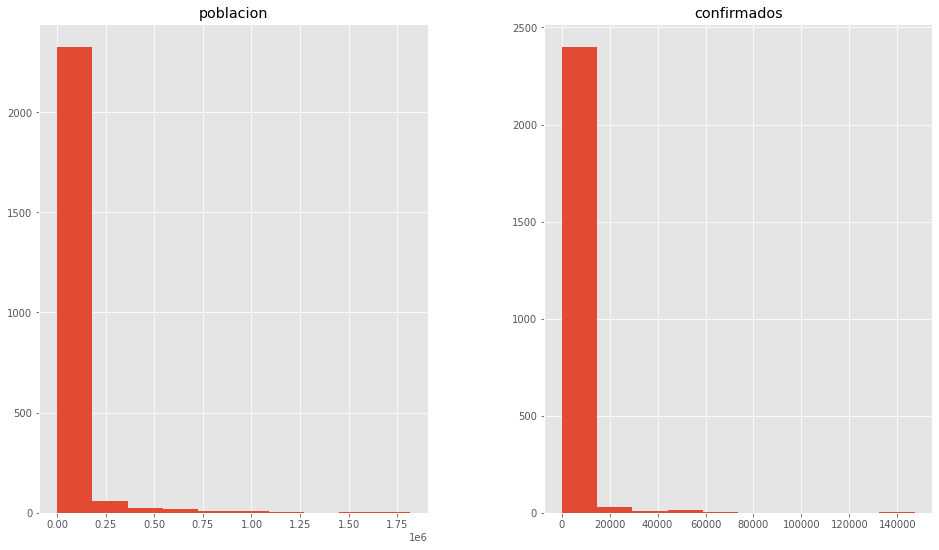

In [32]:
datos[['poblacion', 'confirmados']].hist()
plt.show()

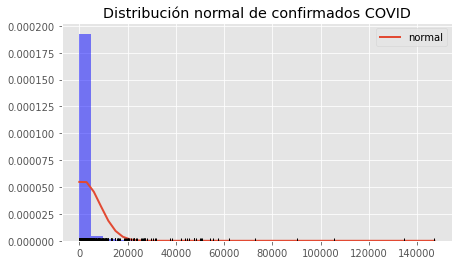

In [33]:
confirmados = datos['confirmados']
mu, sigma = stats.norm.fit(confirmados)
x_hat = np.linspace(min(confirmados), max(confirmados))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label = 'normal')
ax.hist(x=confirmados, density=True, bins= 30, color='blue', alpha=0.5)
ax.plot(confirmados, np.full_like(confirmados, -0.01), '|k', markeredgewidth=1)

ax.set_title('Distribución normal de confirmados COVID')

ax.legend()

Las variables 'confimados' y 'poblacion' no tienen un comportamiento gaussiano ya que al aplicar la distribución normal esta apenas y logra abarcar una cuarta parte de los datos, por lo cual usar este conjunto de datos no sirva para recopilar información haciendo uso de la regresión lineal simple.

###Diagrama de dispersión

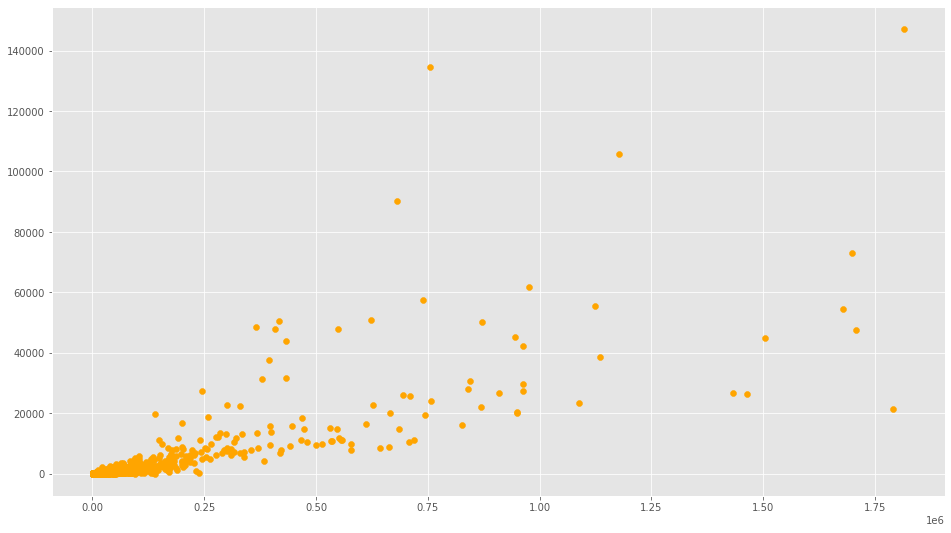

In [34]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='orange')
plt.show()

##Aplicar modelos de regresión

Se utiliza la función linear_model.LinearRegression() para construir la regresión lineal.

Se almacena la regresión en una variable llamada regr.

Se construye un modelo de entrenamiento con todos los datos.

In [35]:
regr   = linear_model.LinearRegression()
poblacion = np.array(datos['poblacion'])

poblacion

array([ 15290,  22358,   5862, ...,  31804, 155533,   2855])

In [36]:
confirmados = np.array(datos['confirmados'])
confirmados

array([ 203,   92,   53, ...,  497, 9764,   38])

In [37]:
regr.fit(poblacion.reshape(-1, 1), confirmados)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Objeto de predicción

Se construye objeto de predicción para construir la recta lineal

In [38]:
y_pred = regr.predict(poblacion.reshape(-1, 1))
y_pred

array([  39.54377041,  311.46466101, -323.17130551, ...,  674.87223495,
       5434.98823285, -438.85694756])

##Evaluar el modelo
Se muestran los valores de los coeficientes de la ecuación:

$Y = \beta 0 + \beta 1 \cdot{x_i}$

In [39]:
print('Coeficiente:', regr.coef_)

#Este es el valor donde se corta el eje Y (en X = 0)
print('Termino independiente: %.2f' % regr.intercept_)

#Error cuadrado medio
print("Error cuadrado medio: %.2f" %mean_squared_error(confirmados, y_pred))

#Puntaje de varianza. El mejor puntuaje es un 1.0
print('Puntuaje de varianza: %.2f' % r2_score(confirmados, y_pred))

Coeficiente: [0.03847211]
Termino independiente: -548.69
Error cuadrado medio: 18682525.19
Puntuaje de varianza: 0.63


$\beta 1$ = 0.03847211

Y = -548.69 + 0.03847211 $\cdot{x_i}$

¿Cuántos casos confirmados deberian existir para una población de 50,000?

1,374.91 = -548.69 + 0.03847211 * 50000

##Visualiza recta

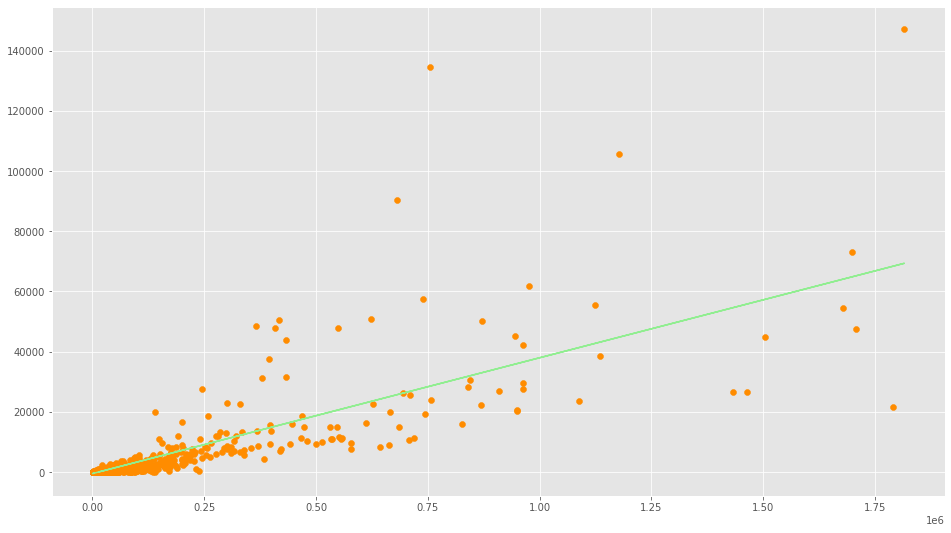

In [40]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='darkorange')
plt.plot(poblacion, y_pred, c= 'lightgreen')
plt.show()

##Predecir valores

¿Cuál es la predicción de casos confirmados para una población de 50,000?

¿Cuál es la predicción de casos confirmados para una población de 100,000?

¿Cuál es la predicción de casos confirmados para una población de 200,000?

In [41]:
prediccion = regr.predict([[50000]])
print(int(prediccion))

1374


In [42]:
prediccion = regr.predict([[100000]])
print(int(prediccion))

3298


In [43]:
prediccion = regr.predict([[250000]])
print(int(prediccion))

9069


In [44]:
prediccion = regr.predict([[500000]])
print(int(prediccion))

18687


In [45]:
prediccion = regr.predict([[750000]])
print(int(prediccion))

28305


#Interpretación

En esta caso 5. Regresión lineal simple aplicada a los cados sobre casos confirmados de COVID  por municipio, en la Repúliba Mexicana, existe un promedio de contagiados de 1452 casos lo cual dependiendo de la cantidad de habitantes que posee cada municipio puede ser una pequeña o una mediana cantidad de contagiados por el virus.

En un inicio la dispersión de los datos no es mucha, hasta esta concentada para aquellos lugares que poseen menos de 200,000 habitantes, haciendo uso de la regresión lineal podemos ver mejor la relación que existe entre los contagiados y la población de cada municipio, pareciera que tienen una estrecha relación para aquellos lugares que poseen alrededor de 100,000 habitantes.

Al hacer una predición de la cantidad de casos confirmados se muestra que son pocos los que se verian afectados:

*  Para 50,000 habitantes se estima que existan 1374 casos confirmados
*  Para 100,000 habitantes se estima que existan 3298 casos confirmados
*  Para 250,000 habitantes se estima que existan 9069 casos confirmados
*  Para 500,000 habitantes se estima que existan 18687 casos confirmados
*  Para 750,000 habitantes se estima que existan 28305 casos confirmados

No llegan a representar el 5% en cada caso de prueba.